[View in Colaboratory](https://colab.research.google.com/github/PranavMahajan25/Deep-Learning-Implementations/blob/master/MultiLabel_classification(fast_ai).ipynb)

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip3 install fastai

In [0]:
%matplotlib inline

In [0]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.3.1045955195.1531370854; _gid=GA1.3.1771647466.1531370854" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train_v2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1531663236&Signature=c7%2BI0W42cZiNNNcmlgDdFGIkU6NCRjXwVv3PB%2B8SWV5wJm0eRAfDkEbfWDg5xk9eDG6DZB3y3FBQYOmaNcWIed1FEkCQFLNjxCfpRDU7ygSWaplTM3yDUaI%2FAwC0x79NUu94LsseBhaNkJapgQY%2FBp%2Byz0fGPD1K1dGnYD66QOeVrhCRdBPErH4iXhPw8HGLnHEor15t1x5%2BKVrE06FfGzsL4FKttOdUDzXFeA6w6SAjmPT%2BImiY5cAMS%2BM5hB99jygo00j7Fo0BNnleN3uyWtFfaGwpH1xe9zdv2%2B3CyxDAn%2B508QQSTZI5njV2bfVC7WFNhCdDS06ZyImqk8E7vw%3D%3D" -O "train_v2.csv.zip" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.3.1045955195.1531370854; _gid=GA1.3.1771647466.1531370854" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg-additional.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1531663528&Signature=oMWjm6kG3wPw6AEkgKucgHvj9bWStex2qwwwy9HgtL4gMDf%2BTHT8CtXh%2BEmLZjr5MRYKGxYdEvFQLhZqJtM0Fg%2BB%2BQzRjmCZpdcTkJHok3HaCOXzMf1SySMsjKv1My3sXWCmvo1GU%2BLKilea0UuJUFI6p87Oz%2FR7zzTwEXaX%2BAGpwGTNAKD40kWEdZ8jQfEtog8bII8BfcUnIlFmiHUZ8wRJk%2F0KqP%2FZeNCMlmRb4dzLF7xz8uxQqyPTupKVsThHT3%2F6DuE7Uq%2FDIIgfYiyJ3vrmn7%2FNiJLhROTXlvthBWOGaMT0Xj0SEUhmeyhY386745kTzZDzTdh%2BJuF0RH0HEg%3D%3D" -O "test-jpg-additional.tar.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.3.1045955195.1531370854; _gid=GA1.3.1771647466.1531370854" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1531663553&Signature=Lb1Sl5p9SOhBVvESCNfPLq4ArXCaS6wTTjGBMk0C%2B7ifgk3%2BgW7wKuM7lQK8bKwUw8LmqM0Lnqc7aNU%2FUdCJ%2BEBe0qSFvhf%2Fnw8ty5zkaJLDGsnD5DkvzwjMXMuPGMtK0twWD03LgJV2PHP4N2mxbOOjoK3Mt3rHE6m7wySFVadFiCzb0%2F4wVMzWJJybzrKoDGEN9s%2BddeB3IiOuX9RS2ScTJz7K9ViRcsSSsBPS4uRyU0isUsBn%2BJbMqgZD%2FqFs4bTz6vEp%2Bf7y135wwI0MvpzoBkyDLEzbJsFUw06Dx3yUdxEwdktRtmylAKq6LtuQxCYW0elqb5BpNiHJ6EfcRg%3D%3D" -O "test-jpg.tar.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.3.1045955195.1531370854; _gid=GA1.3.1771647466.1531370854" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1531663593&Signature=nT3DkA6EFFJmz9fzfFBYJOYmvCtuVh5CT8Nd8z8HlZKCsk19TcDDev15aaALj66S0meZqv3Qpsj0DqEF1ggRs%2BgVHkoEKzhwSoKYXy%2BHJBA4Z5O%2BCXsAlNzk7NXV3GfpRAu1gfrjd5q1U2o9ICKcnQITkNNQLaonQvbrHmKRWWW53mGSqpR40x2038dF7CMx1Fvyx6fCyv6Cm8oQd4q7xrGOjOSubAyV1clV9tuPY1mvKhnrrziND9XyQxLVc6hvhyfizZHPYB3JD8jnQOudDtUSdPnX7t7Os9DUJ0hK4uYB9c8hlbNPMKFCd60JEpZo9QE7iI6AnPME97BAT56NFg%3D%3D" -O "train-jpg.tar.7z" -c

In [0]:
!ls

In [0]:
!apt-get install unzip
!apt-get install p7zip-full

In [0]:
!unzip -q train_v2.csv.zip
!7za x train-jpg.tar.7z
!tar xf train-jpg.tar
!7za x test-jpg.tar.7z
!tar xf test-jpg.tar
!7za x test-jpg-additional.tar.7z
!tar xf test-jpg-additional.tar

In [10]:
!ls

datalab			 test-jpg-additional.tar.7z  train-jpg.tar.7z
__MACOSX		 test-jpg.tar		     train_v2.csv
test-jpg		 test-jpg.tar.7z	     train_v2.csv.zip
test-jpg-additional	 train-jpg
test-jpg-additional.tar  train-jpg.tar


In [0]:
!pip3 install --no-cache-dir -I pillow
def register_extension(id, extension):
    PIL.Image.EXTENSION[extension.lower()] = id.upper()
PIL.Image.register_extension = register_extension
def register_extensions(id, extensions):
    for extension in extensions:
        register_extension(id, extension)
PIL.Image.register_extensions = register_extensions

#restart run-time #ctrl+M

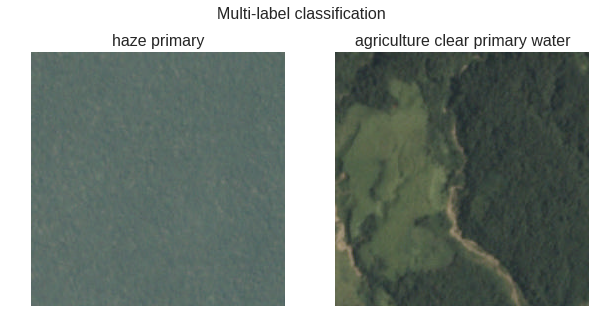

In [1]:
from PIL import Image
from fastai.plots import *
list_paths = [f"train-jpg/train_0.jpg", f"train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In [0]:
from sklearn.metrics import fbeta_score
def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

metrics=[f2]
f_model = resnet34 #using fast.ai library

In [0]:
label_csv = f'train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)  #fast.ai lib funcs
    return ImageClassifierData.from_csv( './','train-jpg', label_csv, tfms=tfms,
                                        suffix='.jpg', val_idxs=val_idxs,
                                        test_name='test-jpg')

In [0]:
data = get_data(256)

In [0]:
x,y = next(iter(data.val_dl))

In [33]:
y #data loader is in batches of images transformed into tensors


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [34]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

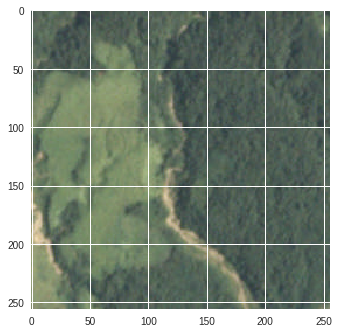

In [35]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);  #dataset is of images, usually 1 image

In [36]:
sz=64
data = get_data(sz)
data = data.resize(int(sz*1.3), 'tmp') #just to speed up things, can skip

In [0]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2         
    0      0.188217   0.275708   0.838427  


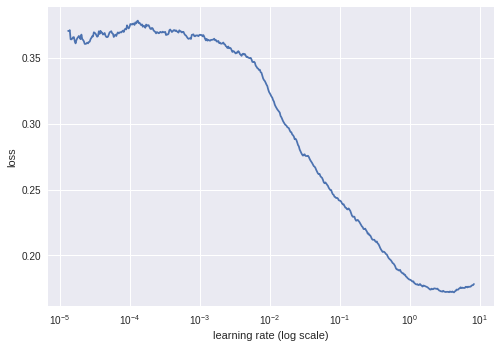

In [40]:
lrf=learn.lr_find()
learn.sched.plot()

In [41]:
lr = 0.2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)


epoch      trn_loss   val_loss   f2         
    0      0.150721   0.136389   0.88001   
 39%|███▊      | 195/506 [00:25<00:40,  7.65it/s, loss=0.145]

    1      0.143424   0.132389   0.883903  
 81%|████████  | 408/506 [00:48<00:11,  8.43it/s, loss=0.14]

    2      0.140354   0.131401   0.885019  
    3      0.140938   0.129295   0.888253  
  2%|▏         | 11/506 [00:02<02:05,  3.95it/s, loss=0.141]

    4      0.136817   0.128054   0.889218  
 58%|█████▊    | 292/506 [00:35<00:26,  8.21it/s, loss=0.133]

    5      0.134623   0.127398   0.889216  
 91%|█████████▏| 462/506 [00:54<00:05,  8.51it/s, loss=0.134]

    6      0.132756   0.127175   0.890119  


[array([0.12717]), 0.8901193407570397]

In [42]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.121888   0.110767   0.906509  
 25%|██▌       | 128/506 [00:28<01:23,  4.50it/s, loss=0.122]

    1      0.118371   0.105885   0.907504  
 51%|█████     | 258/506 [00:56<00:54,  4.55it/s, loss=0.11]

    2      0.113314   0.102368   0.913516  
 66%|██████▌   | 332/506 [01:11<00:37,  4.63it/s, loss=0.117]

    3      0.114893   0.104187   0.911825  
 74%|███████▍  | 375/506 [01:18<00:27,  4.78it/s, loss=0.108]

    4      0.107116   0.100419   0.914987  
 79%|███████▉  | 400/506 [01:22<00:21,  4.86it/s, loss=0.102]

    5      0.102968   0.098371   0.916863  
 82%|████████▏ | 414/506 [01:29<00:19,  4.64it/s, loss=0.0984]

    6      0.100857   0.097663   0.91835   


[array([0.09766]), 0.918350143276803]

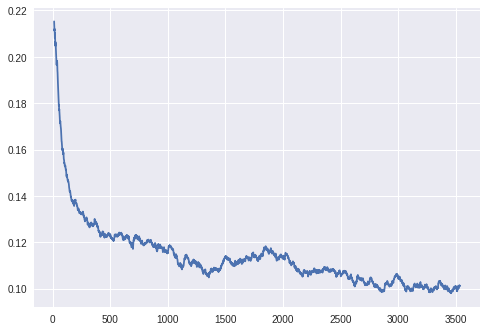

In [43]:
learn.save(f'{sz}')
learn.sched.plot_loss()

In [44]:
sz=128

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.10145    0.099278   0.913534  
 25%|██▌       | 128/506 [00:30<01:31,  4.15it/s, loss=0.104]

    1      0.098729   0.098019   0.917779  
 50%|█████     | 255/506 [00:59<00:58,  4.28it/s, loss=0.0983]

    2      0.099896   0.097714   0.916251  
 65%|██████▍   | 328/506 [01:16<00:41,  4.31it/s, loss=0.102]

    3      0.097563   0.096497   0.918271  
 73%|███████▎  | 369/506 [01:24<00:31,  4.37it/s, loss=0.0983]

    4      0.098881   0.096403   0.917328  
 77%|███████▋  | 392/506 [01:28<00:25,  4.41it/s, loss=0.0985]

    5      0.097705   0.095404   0.918764  
 80%|████████  | 406/506 [01:33<00:23,  4.34it/s, loss=0.0986]

    6      0.095348   0.095176   0.918601  


[array([0.09518]), 0.9186014286645835]

In [45]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.09659    0.089894   0.925431  
 25%|██▍       | 124/506 [01:09<03:32,  1.80it/s, loss=0.095] 

    1      0.092362   0.088178   0.926498  
 49%|████▉     | 249/506 [02:15<02:20,  1.83it/s, loss=0.0914]

    2      0.087633   0.086798   0.927814  
 64%|██████▎   | 322/506 [02:54<01:39,  1.84it/s, loss=0.0956]

    3      0.093546   0.089129   0.925662  
 72%|███████▏  | 364/506 [03:18<01:17,  1.83it/s, loss=0.0901]

    4      0.089486   0.087617   0.926279  
 77%|███████▋  | 389/506 [03:30<01:03,  1.84it/s, loss=0.0883]

    5      0.085731   0.08654    0.927784  
 80%|███████▉  | 404/506 [03:39<00:55,  1.84it/s, loss=0.0862]

    6      0.082091   0.085423   0.928977  


In [46]:
sz = 256

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.091837   0.090492   0.924103  
 25%|██▍       | 124/506 [01:18<04:01,  1.58it/s, loss=0.0906]

    1      0.091008   0.089702   0.925084  
 49%|████▉     | 249/506 [02:33<02:38,  1.62it/s, loss=0.0923]

    2      0.090706   0.08937    0.924807  
 64%|██████▎   | 322/506 [03:17<01:52,  1.63it/s, loss=0.0911]

    3      0.091659   0.089602   0.924387  
 72%|███████▏  | 364/506 [03:43<01:27,  1.63it/s, loss=0.0895]

    4      0.088792   0.08898    0.924674  
 77%|███████▋  | 389/506 [03:56<01:11,  1.65it/s, loss=0.0899]

    5      0.09052    0.088649   0.925489  
 80%|███████▉  | 404/506 [04:06<01:02,  1.64it/s, loss=0.0877]

    6      0.090467   0.088345   0.925648  


[array([0.08834]), 0.9256483473510746]

In [0]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.08992    0.084669   0.929704  
 25%|██▍       | 124/506 [03:31<10:52,  1.71s/it, loss=0.0892]

    1      0.087029   0.084162   0.929794  
 49%|████▉     | 249/506 [07:02<07:15,  1.70s/it, loss=0.0843]

 79%|███████▉  | 400/506 [11:18<02:59,  1.70s/it, loss=0.0841]

In [0]:

multi_predsmulti_pr , y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [0]:
f2(preds,y)